## Exercise 4.6

Create low-pass, band-pass and band-reject filters with the coefficients defined in Eq.4.13-Eq.4.29 and with the following parameters:

$fc=1200 Hz$; $BW=500 Hz$. 

Write code to plot the filter frequency response and its zero-pole diagram.

Plot the spectrograms of a speech signal (loaded from file) before and after filtering.

In [1]:
import numpy as np
import scipy.io.wavfile as wave
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plot_filter(b, a=1):
    ''' Plot zero-pole diagram and frequency response of the filter (b, a) '''
    plt.subplots(1, 3, figsize=(11, 3))

    w, h = sig.freqz(b, a)
    z, p, k = sig.tf2zpk(b, a)
    
    plt.subplot(131)
    plt.title("Magnitude response")
    plt.plot(np.abs(h))
    plt.grid()

    plt.subplot(132)
    plt.title("Phase response (unwrapped)")
    plt.plot(np.unwrap(np.angle(h)))
    plt.grid()

    plt.subplot(133)
    plt.plot(np.real(z), np.imag(z), 'ok')
    plt.plot(np.real(p), np.imag(p), 'xr')
    
    # plot unit circle
    phis = np.arange(0, 2 * np.pi, 0.01)
    plt.plot(np.cos(phis), np.sin(phis), c='b')
    plt.grid()
    plt.xlim([-2.2, 2.2])
    plt.ylim([-2.2, 2.2])
    plt.legend(['Zeros', 'Poles'], loc=2)


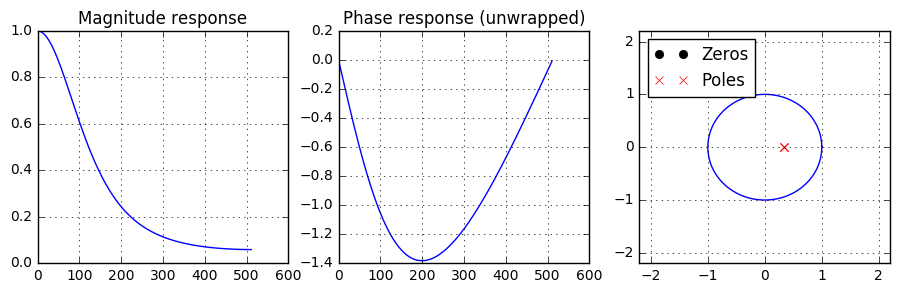

In [3]:
# initial signal
try:
    fs, s = wave.read("speech_sample.wav")
    
    # amplify signal to make spectrograms look brighter
    s *= 20
except IOError:
    print("Could not open speech_sample.wav file")
else:
    cutoff = 1200
    omega_cutoff = 2 * np.pi * cutoff / fs
    bw = 500
    
    # Four-pole LP filter
    b = [(1 - np.exp(-14.445 * cutoff / fs)) ** 4]
    a = [
         1,
         -4 * np.exp(-14.445 * cutoff / fs),
         6 * np.exp(-14.445 * 2 * cutoff / fs),
         -4 * np.exp(-14.445 * 3 * cutoff / fs),
         np.exp(-14.445 * 4 * cutoff / fs)
        ]
    
    # get and plot LP filter characteristics
    plot_filter(b, a)
    
    # filter signal with LP
    filtered1 = sig.lfilter(b, a, s)


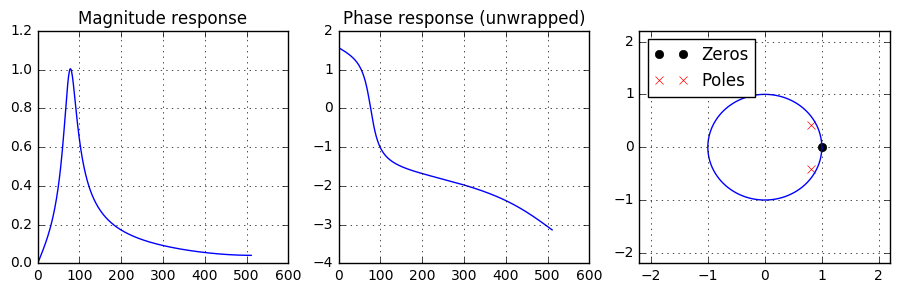

In [4]:
r = 1 - 3 * bw / fs
k = (1 - 2 * r * np.cos(omega_cutoff) + r ** 2) / (2 - 2 * np.cos(omega_cutoff))
    
b = [1 - k, 2 * (k - r) * np.cos(omega_cutoff), r ** 2 - k]
a = [1, -2 * r * np.cos(omega_cutoff), r ** 2]
    
# get Band-Reject filter characteristics
plot_filter(b, a)
    
# filter signal with BP
filtered2 = sig.lfilter(b, a, s)


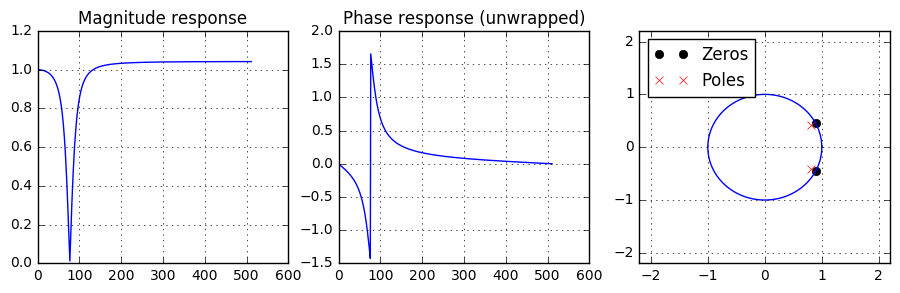

In [5]:
b = [k, -2 * k * np.cos(omega_cutoff), k]
a = [1, -2 * r * np.cos(omega_cutoff), r ** 2]
    
# get Band-Reject filter characteristics
plot_filter(b, a)
    
# filter signal with BR
filtered3 = sig.lfilter(b, a, s)


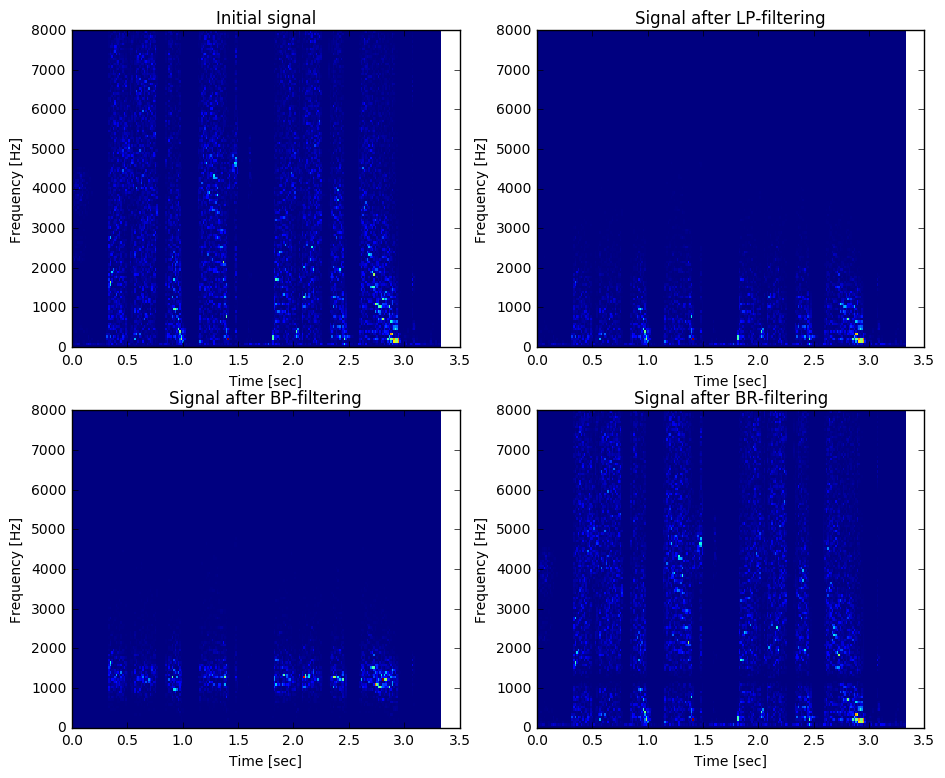

In [6]:
plt.subplots(2, 2, figsize=(11, 9))

plt.subplot(221)
plt.title('Initial signal')
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(222)
plt.title('Signal after LP-filtering')
f, t, Sxx = sig.spectrogram(filtered1, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(223)
plt.title('Signal after BP-filtering')
f, t, Sxx = sig.spectrogram(filtered2, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(224)
plt.title('Signal after BR-filtering')
f, t, Sxx = sig.spectrogram(filtered3, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
